<center><h1> Formation en Machine Learning et Deep Learning</h1></center>
<center><h3> Atelier1 : comprendre la Classification Supervisée </h3>
</center>

**Objectif** : Former les participants à l'entraînement d'un modèle de classification supervisée en utilisant un dataset simple et visuel. L'atelier inclut l’exploration des données, l'entraînement du modèle et la visualisation des résultats.

Exemple d'application (simple):
Prédiction d'admission à une université en fonction du score d’examen et du score d’entretien.

***Données:***
Nous allons utiliser un modèle de classification supervisée pour prédire si un étudiant sera accepté ou refusé en fonction de deux critères :
*   le score d’examen
*   le score d’entretien
***Algorithme de classification:**
Nous allons utiliser la Régression logistique


<H3>Chargement et Exploration des Données</H2>
Importer les bibliothèques et charger le dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from matplotlib.colors import ListedColormap

**Explication des bibliothéques**:
*   NumPy - Manipulation des tableaux numériques
*   Pandas - Manipulation et Analyse de Données
*   Matplotlib - Visualisation des données
*   Seaborn - Visualisation avancée des données
*   Scikit-Learn - Bibliothèque de Machine Learning:

train_test_split: Diviser les données en des données d'entrainement et de validation (test). <br>
LogisticRegression: Modéle de classification Régression logistique<br>
accuracy_score, classification_report, confusion_matrix: les metriques d'évaluation<br>











<H3> Exemple simple </h3>
Prédire l'acceptation ou non d'un candidat à un concours utilisant ses notes d'examen ecrit et son score d'entretien

In [ ]:
import pandas as pd
# Création du dataset fictif
data = {
    "Score_Examen": [50, 55, 60, 65, 70, 75, 80, 85, 88, 90, 92, 95],
    "Score_Entretien": [30, 35, 40, 45, 50, 55, 60, 65, 68, 70, 75, 80],
    "Admission": [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]  # 1 = Accepté, 0 = Refusé
}

df = pd.DataFrame(data)

# Affichage des premières lignes
print(df.head())

   Score_Examen  Score_Entretien  Admission
0            50               30          0
1            55               35          0
2            60               40          0
3            65               45          0
4            70               50          0


**Visualiser les données**

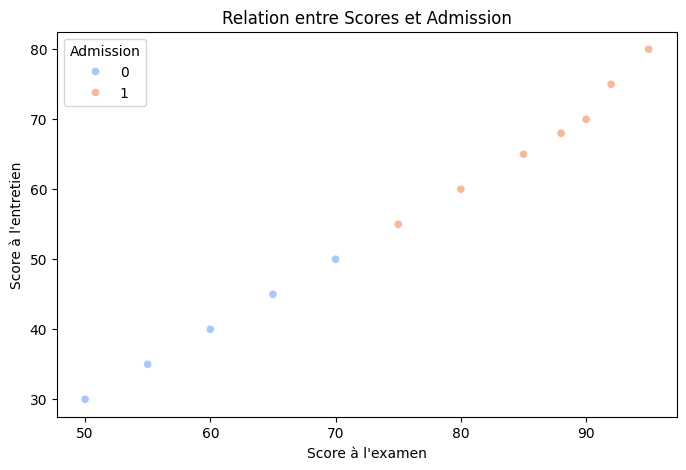

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.scatterplot(x=df["Score_Examen"], y=df["Score_Entretien"], hue=df["Admission"], palette="coolwarm")
plt.xlabel("Score à l'examen")
plt.ylabel("Score à l'entretien")
plt.title("Relation entre Scores et Admission")
plt.show()

Chaque point représente un étudiant. Les couleurs montrent s'il a été accepté (1) ou refusé (0). <br>
Le but du modèle est d'apprendre à tracer une frontière de décision qui sépare les étudiants acceptés et refusés.

**Prétraitement des Données et Séparation**

X: Représente la matrice de caractèristiques. Nous avons deux caractèristiques "Score_Examen" et "Score_Entretien".

y: représente les lables. 1 si accepté et 0 si refusé

In [ ]:
X = df[["Score_Examen", "Score_Entretien"]]
y = df["Admission"]

Nous allons diviser les données en 80% pour les données d'entrainement et 20% pour les données de validation ou de test.

X_train et y_train sont les données et labels d'entrainement.

X_text et y_test sont les données et labels de validation.

In [ ]:
from sklearn.model_selection import train_test_split

# Séparer X et y en ensembles d'entraînement et de test (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Taille des données d'entraînement : {X_train.shape}")
print(f"Taille des données de test : {X_test.shape}")


Taille des données d'entraînement : (9, 2)
Taille des données de test : (3, 2)


<h3>Entraînement d'un Modèle de Classification</h3>
Nous allons utiliser un modèle simple pour la classification: Régression Logistique

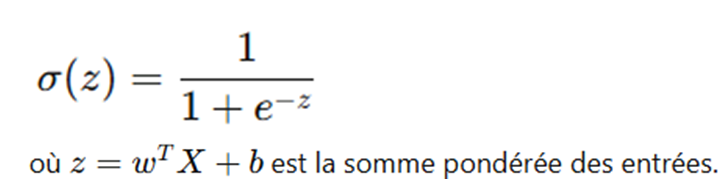

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialisation du modèle
model = LogisticRegression(
    penalty='l2',
    max_iter=1000,
    random_state=42
)

In [ ]:
# Entraînement du modèle
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

Afficher les paramètres estimés (aprés entrainement) de la Régression Logistique

In [ ]:
print("W (Coefficients pour RL):", model.coef_)
print("Biais (Intercept pour RL):", model.intercept_)


W (Coefficients pour RL): [[0.46333922 0.46335117]]
Biais (Intercept pour RL): [-57.91800303]


Dans cet exemple, nous avons deux caractèrsitiques:

*   0.46333922 est la pondération de la première caractèristique
*   0.46335117 est la pondération de la deixème caractèristique

Pour une nouvelle entrées (x1, x2), nous allons calculer:
*   z= 0.46333922 * x1 + 0.46335117 * x2 + (-57.91800303)

On applique la fonction sigmoid(z)

*   Si, sa valeur est >= 0.5 alors y=1
*   Sinon, y=0

<h3>Evaluation du modèle de classification</h3>
Dans cette étape, nous allons utiliser notre modèle entrainé pour prédire les classes des entrées de validation X_test. Aprés, nous allons comparer les prédiction avec les classes réelles y_test.

In [ ]:
# Prédire les classes sur l'ensemble de test
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

# Évaluer la précision (Accuracy) du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy (Précision) du modèle : {accuracy:.2f}")

Accuracy (Précision) du modèle : 1.00


In [ ]:
from sklearn.metrics import confusion_matrix

print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred))

Matrice de confusion :
 [[1 0]
 [0 2]]


In [ ]:
from sklearn.metrics import classification_report

print("Rapport de classification :\n", classification_report(y_test, y_pred))

Rapport de classification :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



<H2> Exemple avancé: "Breast Cancer Classification" utilisant des caractéristiques extraites</h2>

Le dataset Breast Cancer Wisconsin (Diagnostic) est un dataset prédéfini dans Scikit-learn qui contient des informations médicales permettant de classer une tumeur comme bénigne ou maligne.


**Desciption du dataset Breast Cancer:**

*   Nombre d’échantillons : 569
*   Nombre de caractéristiques : 30 (extraites de la tumeur)

Nombre de classes : 2
*   0 : Maligne (danger)
*   1 : Bénigne (non dangereux)

**Objectif** : Prédire si une tumeur est bénigne (0) ou maligne (1) à partir de 30 caractéristiques extraites d'images de cellules du sein.


In [ ]:
# Import nécessaire
import pandas as pd
from sklearn.datasets import load_breast_cancer

# Charger le dataset Breast Cancer
cancer = load_breast_cancer()

# Convertir en DataFrame Pandas
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

# Ajouter la colonne cible
df['target'] = cancer.target

# Affichage des 5 premières lignes
print(df.head())


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

**Visualiser la distribution des classes**

Les classes:

*   0 = Tumeur maligne
*   1 = Tumeur bénigne


/tmp/ipython-input-1207/338817714.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["target"], palette="coolwarm")


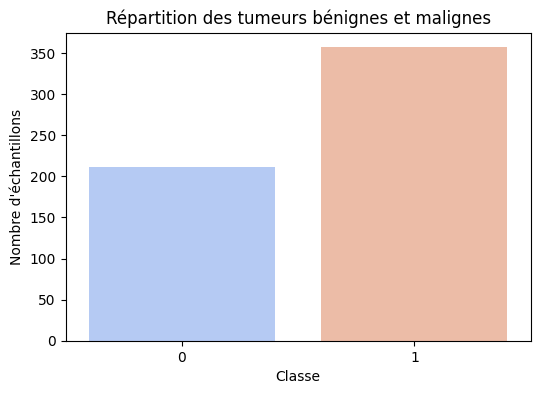

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x=df["target"], palette="coolwarm")
plt.xlabel("Classe")
plt.ylabel("Nombre d'échantillons")
plt.title("Répartition des tumeurs bénignes et malignes")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
# Séparer en train et test (80% entraînement, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Taille des données d\'entraînement : {X_train.shape}')
print(f'Taille des données de test : {X_test.shape}')

Taille des données d'entraînement : (9, 2)
Taille des données de test : (3, 2)


<H3>Entraînement et Évaluation des Modèles</H3>
Nous allons tester plusieurs algorithmes de classification supervisée sur le dataset Iris, en comparant leurs performances.

Les algorithmes à tester :

1.   Régression Logistique
2.   Support Vector Machine (SVM) avec différents kernels (linear, rbf)
3.   Decision Tree (DT)
4.   K-Nearest Neighbors (KNN)
5.   Random Forest (RF)

Nous allons entraîner chaque modèle, prédire les classes et évaluer leurs performances.

<h4>1- Régression Logistique</h4>

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialisation du modèle
model_lr = LogisticRegression(
    penalty='l2',      # régularisation L2
    max_iter=100,      # nombre max d'itérations
    random_state=42
)

# Entraînement du modèle
model_lr.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred_lr = model_lr.predict(X_test)

# Évaluation du modèle
print("Régression Logistique - Accuracy :", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Régression Logistique - Accuracy : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



<h4>2- Support Vector Machine (SVM)</h4>

**SVM avec Kernel Linéaire**


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialisation du modèle SVM avec noyau linéaire
model_svm_linear = SVC(
    kernel='linear',       # Type de noyau : 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'
    C=1.0,                 # Paramètre de régularisation
    gamma='scale',         # 'scale' = 1 / (n_features * variance)
    max_iter=-1            # Nombre max d'itérations (-1 = illimité)
)

# Entraînement du modèle
model_svm_linear.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred_svm_linear = model_svm_linear.predict(X_test)

# Évaluation du modèle
print("SVM (Linear Kernel) - Accuracy :", accuracy_score(y_test, y_pred_svm_linear))
print(classification_report(y_test, y_pred_svm_linear))


SVM (Linear Kernel) - Accuracy : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



**SVM avec Kernel RBF (Radial Basis Function)**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialisation du modèle SVM avec noyau RBF
model_svm_rbf = SVC(
    kernel='rbf',       # noyau RBF (non linéaire)
    C=1.0,              # paramètre de régularisation
    gamma='scale',      # 'scale' = 1 / (n_features * variance)
    max_iter=-1         # nombre max d'itérations (-1 = illimité)
)

# Entraînement du modèle
model_svm_rbf.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred_svm_rbf = model_svm_rbf.predict(X_test)

# Évaluation du modèle
print("SVM (RBF Kernel) - Accuracy :", accuracy_score(y_test, y_pred_svm_rbf))
print(classification_report(y_test, y_pred_svm_rbf))


SVM (RBF Kernel) - Accuracy : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



<h4>3- Decision Tree (DT)</h4>

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialisation du modèle Decision Tree
model_dt = DecisionTreeClassifier(
    criterion='gini',       # fonction d’évaluation : 'gini' ou 'entropy'
    splitter='best',        # 'best' = meilleur split, 'random' = split aléatoire
    random_state=42         # pour reproductibilité
)

# Entraînement du modèle
model_dt.fit(X_train, y_train)

# Prédiction sur le jeu de test
y_pred_dt = model_dt.predict(X_test)

# Évaluation du modèle
print("Decision Tree - Accuracy :", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Decision Tree - Accuracy : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



<h4>4- K-Nearest Neighbors (KNN)</h4>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialisation du modèle KNN
model_knn = KNeighborsClassifier(
    n_neighbors=5,       # nombre de voisins K
    metric='minkowski'   # distance utilisée ('minkowski' avec p=2 = euclidean)
)

# Entraînement du modèle
model_knn.fit(X_train, y_train)

# Prédiction sur le jeu de test
y_pred_knn = model_knn.predict(X_test)

# Évaluation du modèle
print("KNN (k=5) - Accuracy :", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

KNN (k=5) - Accuracy : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



<h4>5- Random Forest (RF)</h4>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialisation du modèle Random Forest
model_rf = RandomForestClassifier(
    n_estimators=100,   # nombre d'arbres
    criterion='gini',   # fonction d’évaluation
    random_state=42     # reproductibilité
)

# Entraînement du modèle
model_rf.fit(X_train, y_train)

# Prédiction sur le jeu de test
y_pred_rf = model_rf.predict(X_test)

# Évaluation du modèle
print("Random Forest - Accuracy :", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest - Accuracy : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



<H4> Comparaison des Modèles</h4>

Comparer la précision de chaque modèle

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)